In [3]:
import pandas as pd
import numpy as np

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
# loading dataset using seaborn
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=3)

# 1.) Make a pair plot on Readmission Registry table & do u see any correlation between columns values.

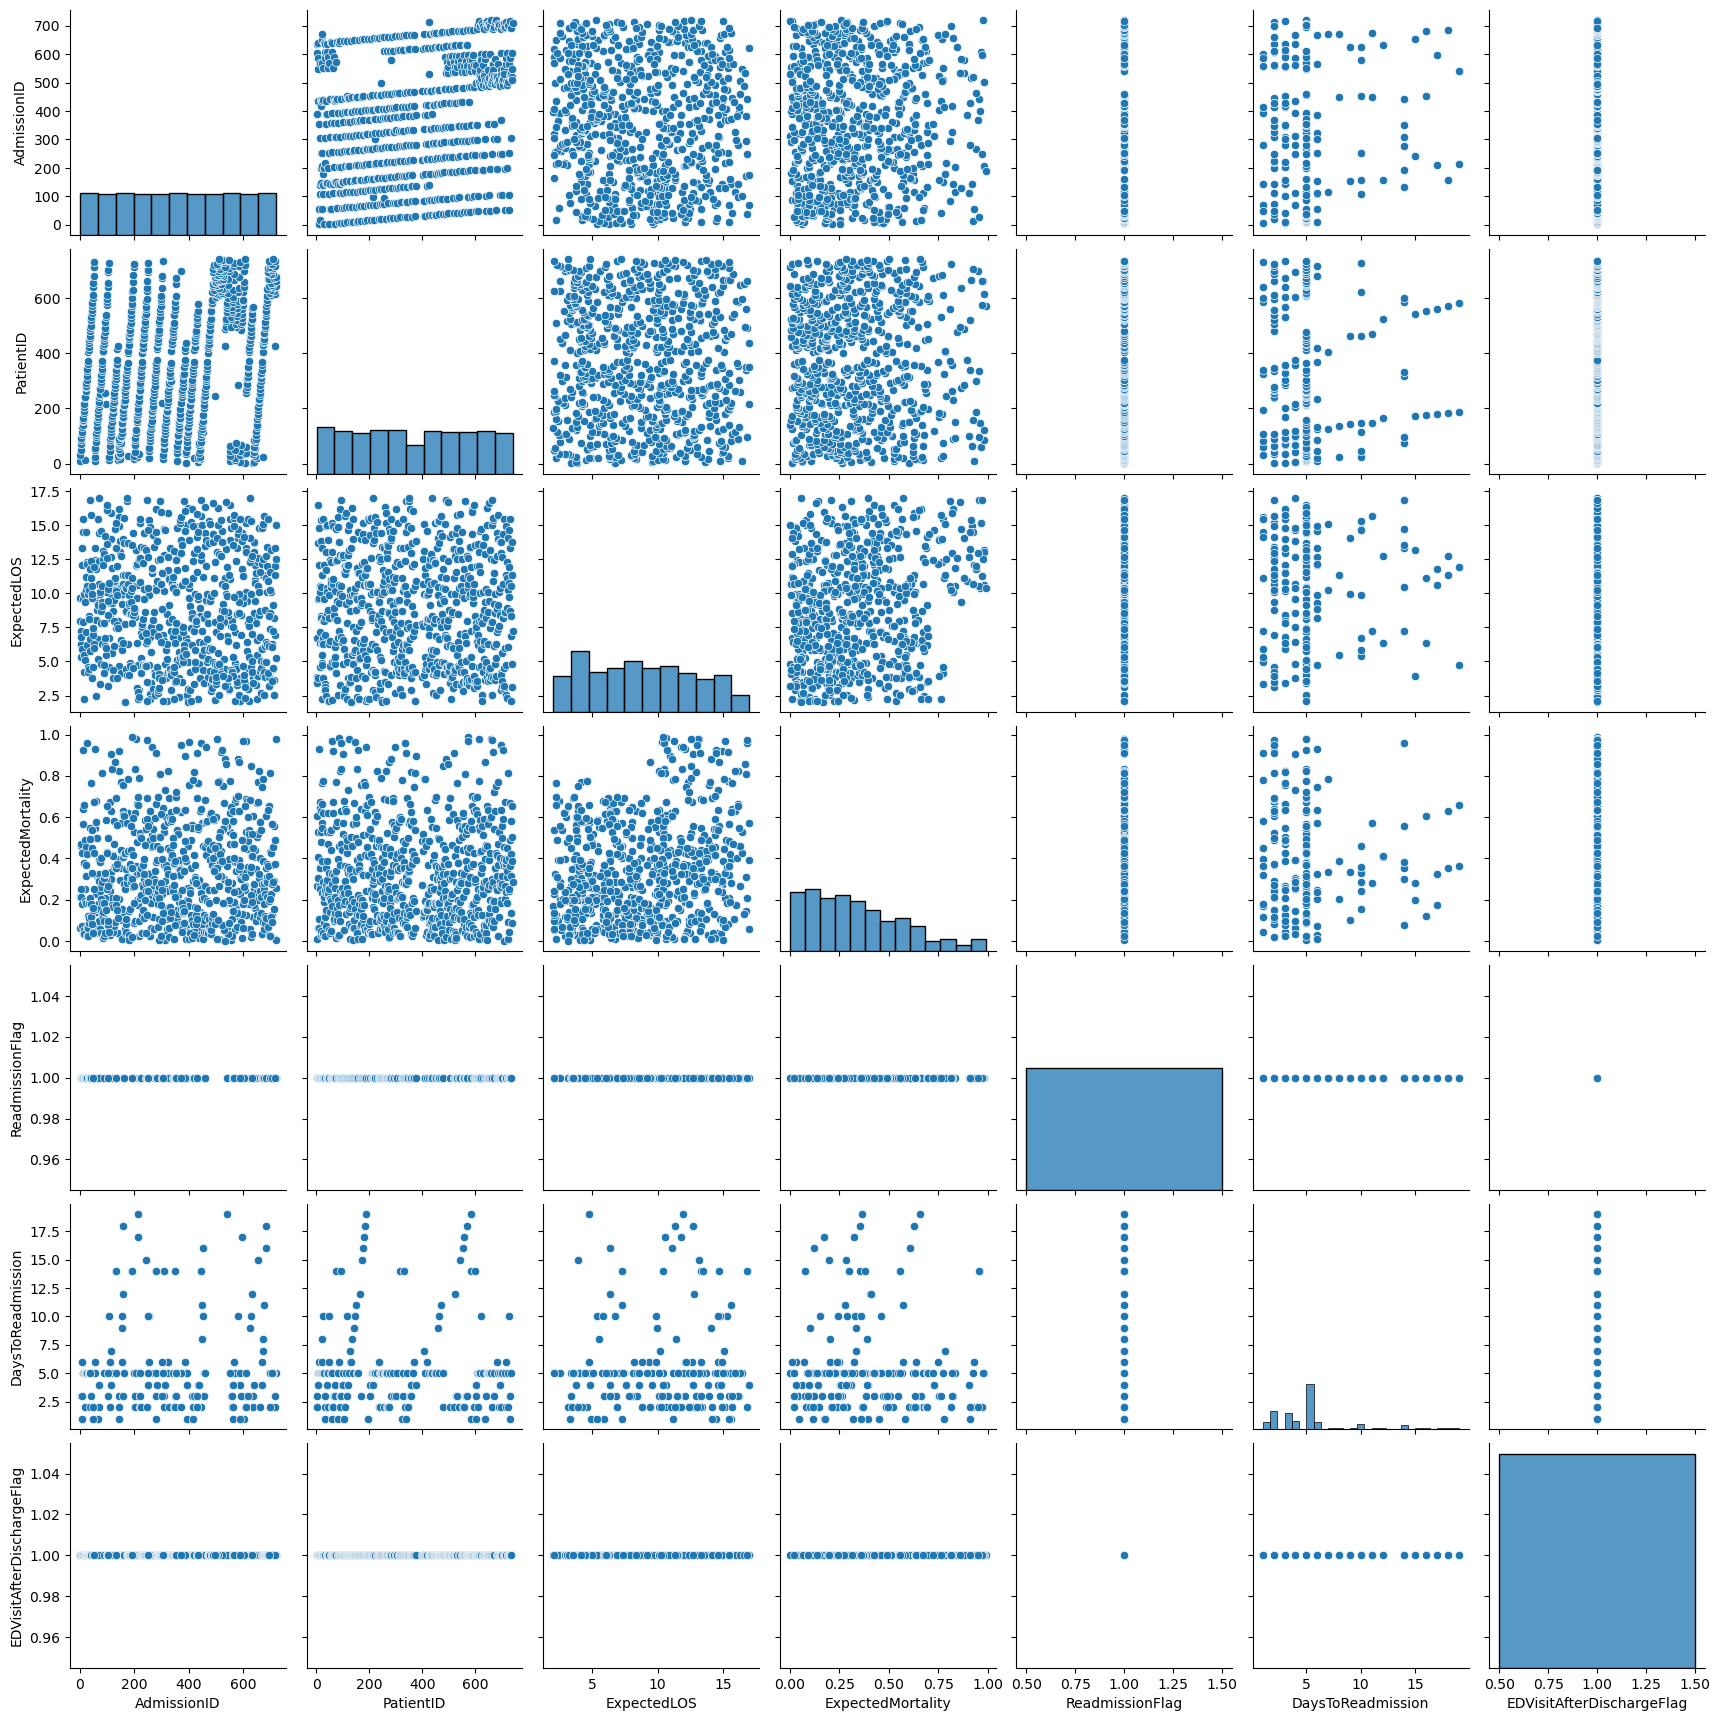

                           AdmissionID  PatientID  ExpectedLOS  \
AdmissionID                   1.000000   0.302079    -0.070080   
PatientID                     0.302079   1.000000    -0.015485   
ExpectedLOS                  -0.070080  -0.015485     1.000000   
ExpectedMortality             0.034083   0.008014     0.220725   
ReadmissionFlag                    NaN        NaN          NaN   
DaysToReadmission             0.049632   0.001710     0.010294   
EDVisitAfterDischargeFlag          NaN        NaN          NaN   

                           ExpectedMortality  ReadmissionFlag  \
AdmissionID                         0.034083              NaN   
PatientID                           0.008014              NaN   
ExpectedLOS                         0.220725              NaN   
ExpectedMortality                   1.000000              NaN   
ReadmissionFlag                          NaN              NaN   
DaysToReadmission                  -0.052563              NaN   
EDVisitAfterDisc

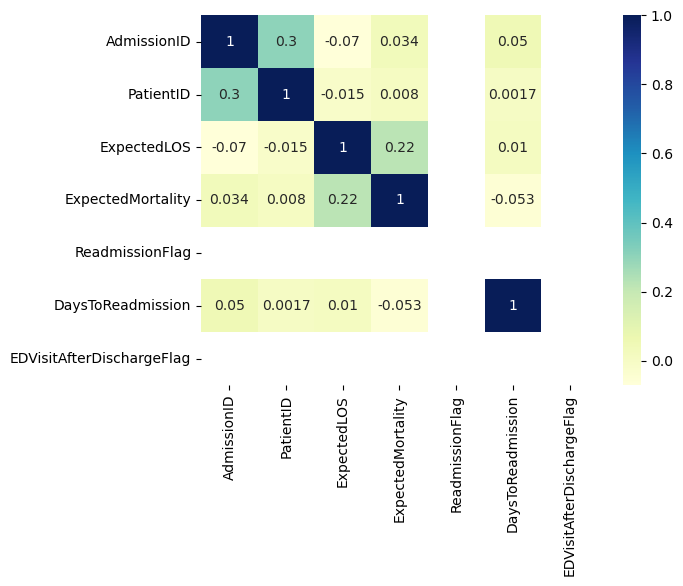

In [5]:
# plotting pairplot
sb.pairplot(df)
plt.show()

# plotting correlation heatmap
print(df.corr())

dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# 2.) Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [6]:
# loading dataset using pandas
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=0)

# Retrieving the firstname and lastname of patients between indices 101 and 200
df.iloc[101:201, 1:3]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


# 3.) "Create a figure object called fig using plt.figure() **
# ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
# ** Plot (x,y) on that axes and set the labels.
# Note : You can plot on any x,y set of values."

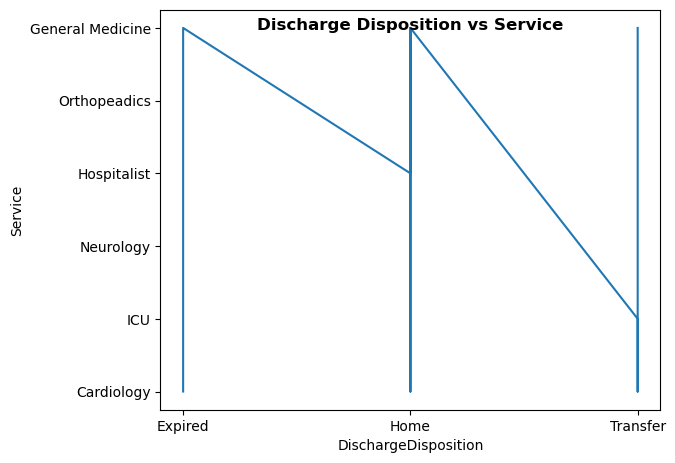

In [7]:
# Implementation of matplotlib function
from matplotlib.figure import Figure

# Reading the dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=4)

# Creting the object fig
fig = plt.figure(figsize =(5, 4))

# Creating the new axis
ax = fig.add_axes([0, 0, 1, 1])

x = list(df['DischargeDisposition'])
y = list(df['Service'])

ax.plot(x,y)

# Giving Title to graph and setting the labels
fig.suptitle('Discharge Disposition vs Service',
            fontweight ="bold")
plt.xlabel('DischargeDisposition')
plt.ylabel('Service')

# Displaying the plot
plt.show()

# 4.) Display data by splitting age in 4 quartiles and labeling the quartiles.

In [20]:
from datetime import date

# Loading Dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=0)

# Getting column DateOfBirth and it's length
listofDOB = list(df['DateOfBirth'])
length = len(listofDOB)

# method to calculate age
def calculateAge(birthDate):
    days_in_year = 365.2425   
    age = int((date.today() - birthDate).days / days_in_year)
    return age

DateOfBirth_year = [d.date() for d in df['DateOfBirth']]
ageList = []

# Iterating through the list to calculate age for each patient
for i in range(length):    
    age = calculateAge((date(DateOfBirth_year[i].year,DateOfBirth_year[i].month,DateOfBirth_year[i].day)))
    ageList.append(age)

# Adding a new column age to Patient Table
df['Age'] = ageList

# Splitting age in 4 quartiles and labeling the quartiles.
df.sort_values(by =['Age'], inplace = True)
df['QuantileRank(0-3)']= pd.qcut(df['Age'],
                             q = 4, labels = False)
df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,QuantileRank(0-3)
358,359,Willetta,Beckensall,1987-05-11 18:30:07.672,Male,White,English,35,0
401,402,Mante,Maro,1987-04-01 07:25:19.273,Male,White,English,35,0
871,872,Chev,Hawford,1987-05-03 08:51:27.568,Female,White,English,35,0
53,55,Chandler,Pow,1987-01-30 14:58:15.754,Female,White,Spanish,35,0
902,903,Schroeder,Inc,1987-02-20 23:47:30.067,Male,Black/African-American,English,35,0
...,...,...,...,...,...,...,...,...,...
443,444,Isis,Grimditch,1960-03-01 01:11:11.217,Male,White,English,62,3
341,342,Gabby,Goretti,1960-05-05 13:57:17.206,Male,White,English,62,3
640,641,Homenick,Wisniewski,1960-02-27 02:59:25.075,Female,Black/African-American,English,62,3
79,81,Labadie,Inc,1960-01-08 07:40:08.261,Female,White,Spanish,63,3


# 5.) Display full name of patients who are born in 1986.

In [22]:
# Loading Dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=0)

# Cahnging the date format to YYYY-MM-DD.
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], format='%Y-%m-%d')

# Getting the rows with year 1986
filtered_df = df.loc[(df['DateOfBirth'] >= '1986-01-01')
                    & (df['DateOfBirth'] < '1986-12-31')]

filtered_df[['FirstName', 'LastName']]

,FirstName,LastName
23,Gabriel,Joseph
24,Lincoln,Brenda
29,Ala,Halpert
72,Lolita,Darci
164,Fadel,Bernardt
238,Bentley,Kippax
367,Vale,Olanda
373,Britt,Dureden
386,Cristabel,Chatel
415,Constantia,Group


# 6.) Create a jointplot on expected mortality & expected length of stay.

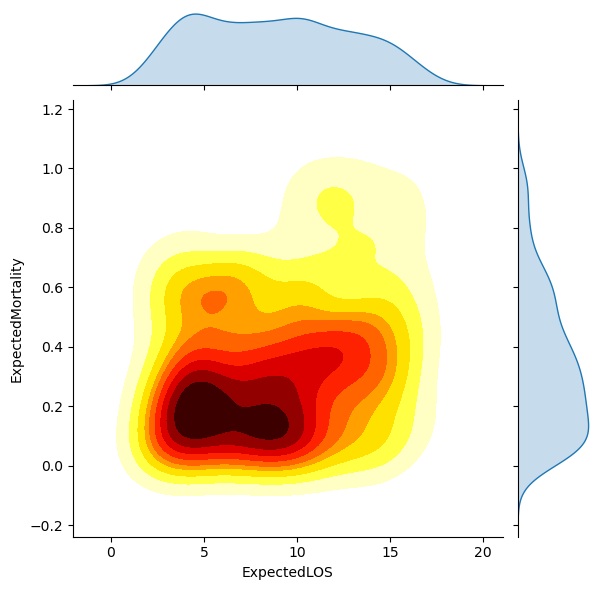

In [8]:
# loading dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=3)
  
# draw jointplot with kde kind
sb.jointplot(x = "ExpectedLOS", y = "ExpectedMortality",
              kind = "kde", cmap='hot_r', data = df, fill=True)
# Show the plot
plt.show()

# 7.) Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

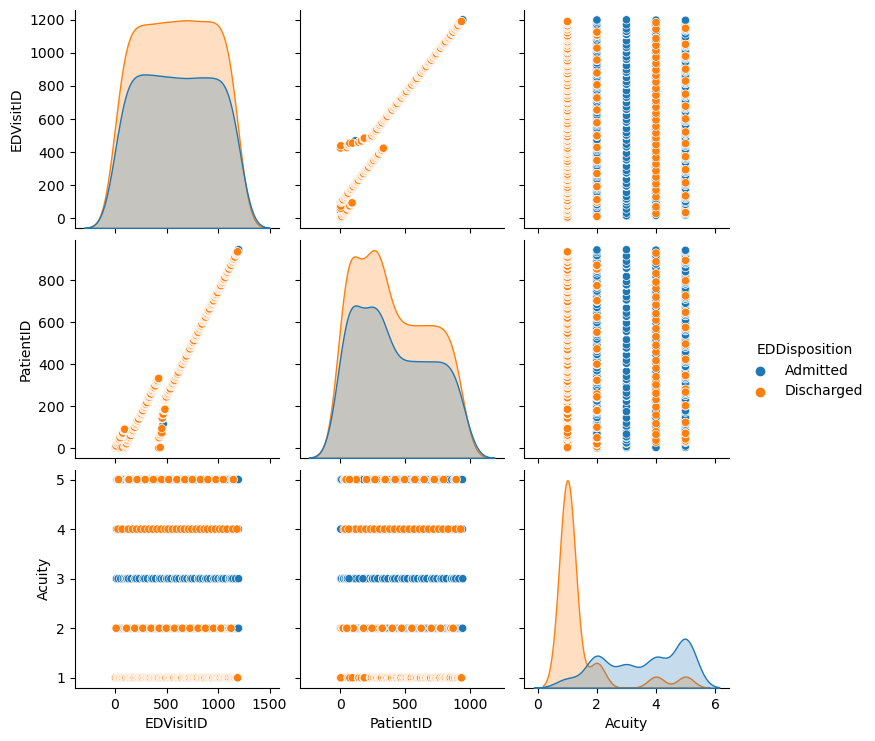

In [9]:
# loading dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=1)
 
# pairplot with hue EDDisposition
sb.pairplot(df, hue ='EDDisposition')
plt.show()

# 8.) Create a bar chart between expectedLOS & Primary diagnosis.

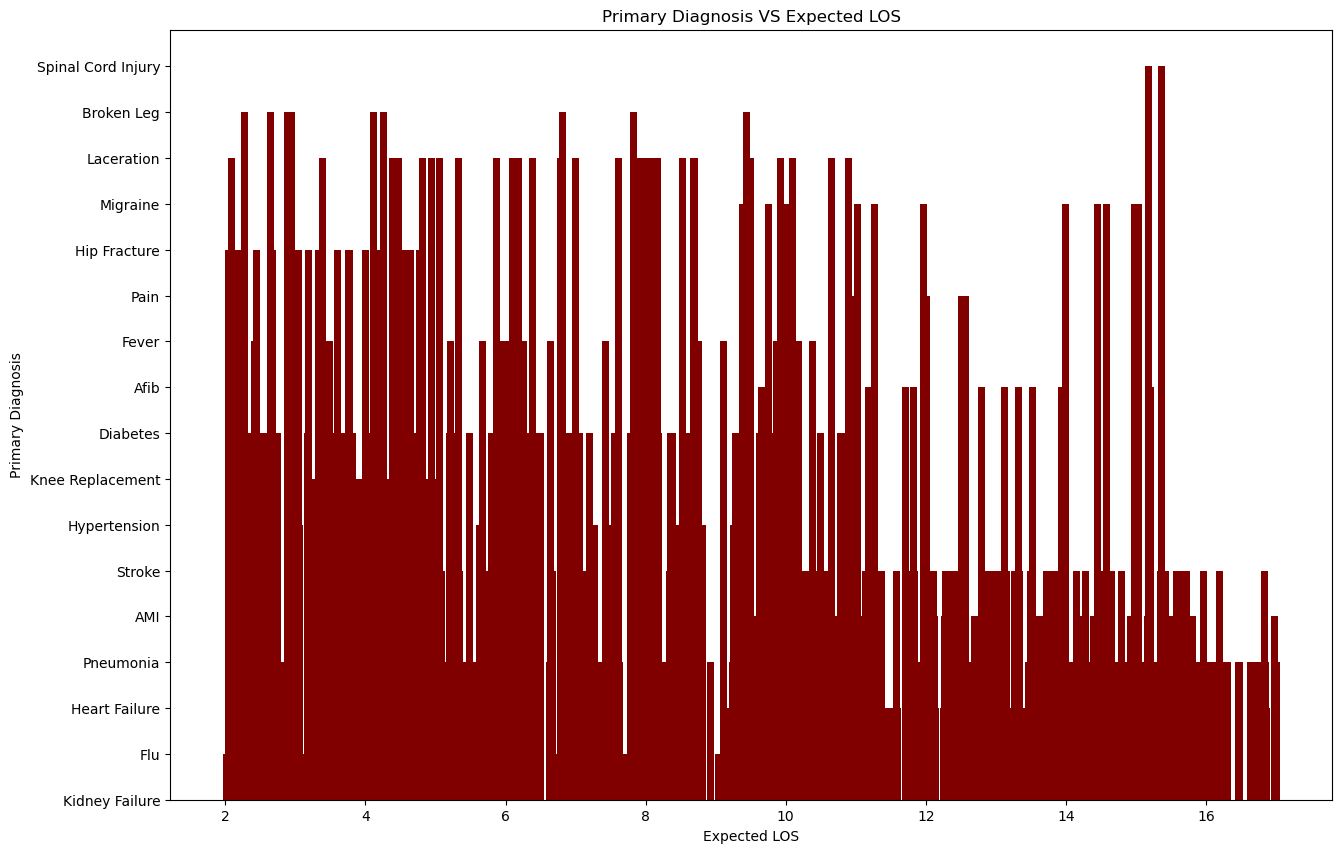

In [10]:
# loading dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=3)

# Creating x and y lists
listofPD = list(df['ExpectedLOS'])
listOfELOS = list(df['PrimaryDiagnosis'])
  
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(listofPD, listOfELOS, color ='maroon',
        width = 0.1)
 
plt.xlabel("Expected LOS")
plt.ylabel("Primary Diagnosis")
plt.title("Primary Diagnosis VS Expected LOS")
plt.show()

# 9.) Get the list of patient ID's which are not there in ReadmissionRegistry.

In [24]:
# Loading Dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=3)

# Selecting row with null values.
selected_rows = df[df['ReadmissionFlag'].isnull()]

selected_rows[['PatientID', 'ReadmissionFlag']]

,PatientID,ReadmissionFlag
0,1,NaN
4,6,NaN
7,9,NaN
13,14,NaN
14,15,NaN
...,...,...
715,738,NaN
716,739,NaN
717,740,NaN
718,741,NaN


# 10.) Create a boxplot on ExpectedLOS by taking service into account.

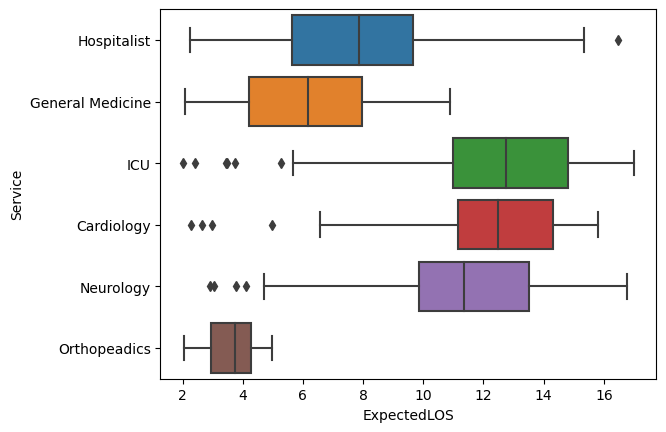

In [11]:
# Loading dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=3)

# Creating Box Plot
sb.boxplot(x="ExpectedLOS", y="Service",data=df)

plt.show()

In [ ]:
# 9.) Get the list of patient ID's which are not there in ReadmissionRegistry.

# 11.) Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

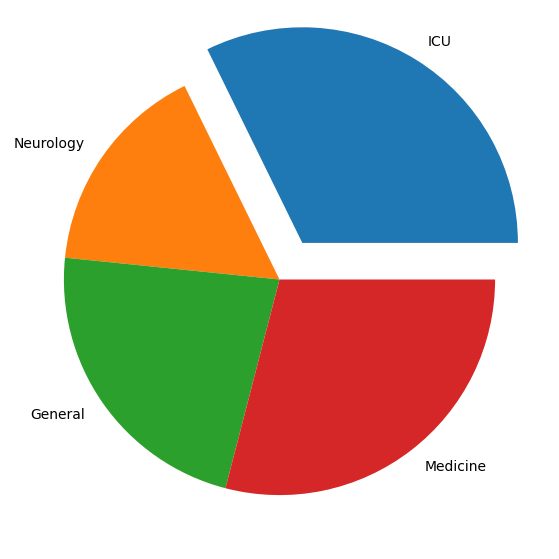

In [19]:
Service= ["ICU", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9] 
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
myexplode = [0.2, 0, 0,  0]

plt.pie(ExpectedLOS, labels = Service, explode = myexplode)
 
# show plot
plt.show()

# 12.) Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T. (Attach screenshots for this question)

In [25]:
import pandas as pd
import pyodbc as pdb 

# Connecting to the SQL Server DB
conn = pdb.connect('Driver={SQL Server};'
                      'Server=LAPTOP-RMK76E63;'
                      'Database=Python;'
                      'Trusted_Connection=yes;')

# Query to get required data
query = """SELECT ProviderName FROM Providers$ WHERE ProviderName LIKE 'T%'"""

# Assigning the result to panadas dataframe
df = pd.read_sql(query, conn)
df

C:\Users\nehav\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ProviderName
0,Ted Texas
1,Ted Green
2,Ted Black
3,Tyler Conner
4,Tony Creed
5,Trent Tye
6,Ted Texas
7,Ted Green
8,Ted Black
9,Tyler Conner


# 13.) Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

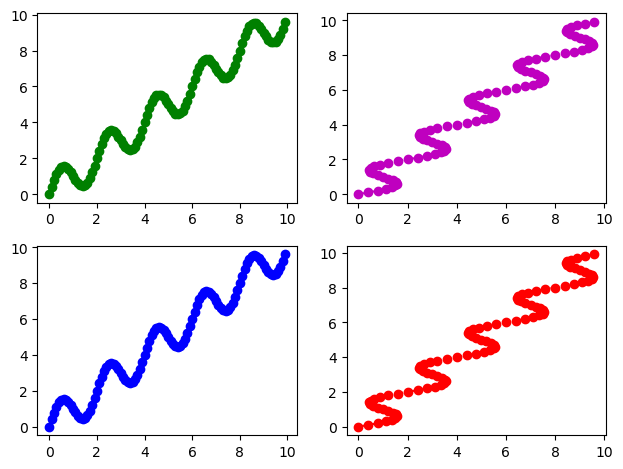

In [18]:
# defining the values of X
x =np.arange(0, 10, 0.1)
  
# defining the value of Y
y =np.sin(np.pi * x) + x
  
# creating the canvas with class 'fig' and it's object 'axes' with '2' rows and '2' columns
fig, axes = plt.subplots(2, 2)
  
# plotting graph for 1st element
axes[0, 0].plot(x, y, 'g--o')
  
# plotting graph for 2nd element
axes[0, 1].plot(y, x, 'm--o')
  
# plotting graph for 3rd element
axes[1, 0].plot(x, y, 'b--o')
  
# plotting graph for 4th element
axes[1, 1].plot(y, x, 'r--o')
  
fig.tight_layout()
plt.show()

# 14.) Find the number of null values in BloodPressureSystolic column.

In [7]:
# Loading dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=2)

# Calculating the null values
print('\033[1m' + "Number of null values in BloodPressureSystolic column:" + '\033[0m')
print((df.BloodPressureSystolic).isnull().sum())

Number of null values in BloodPressureSystolic column:
124


# 15.) Replace all the null values in ReadmissionFlag with 0.

In [13]:
# Loading dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=3)

# Replacing all null values with 0 
df['ReadmissionFlag'] = df['ReadmissionFlag'].fillna(0)
print(df.ReadmissionFlag)

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64


# 16.) Plot a graph to show the distribution of expected length of stay.

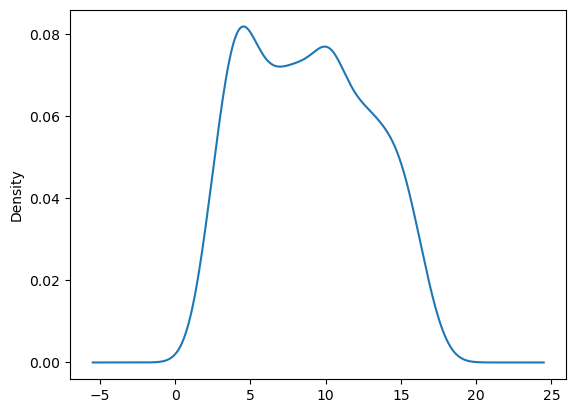

In [14]:
# Loading dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=3)

# Plotting distribution of Expected LOS
df['ExpectedLOS'].plot(kind='kde')
plt.show()

# 17.) Create a heat map to show the correlation between the column values of Edvisits.

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


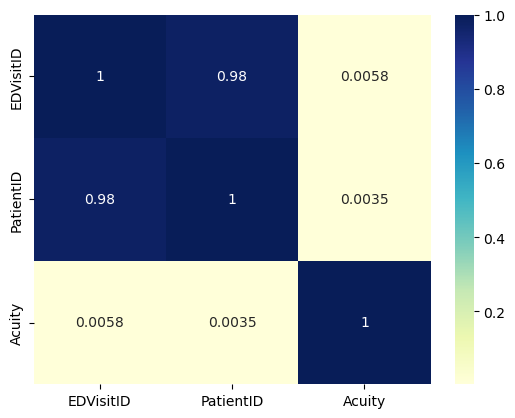

In [15]:
# Loading Dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=1)
  
print(df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# 18.) Add column 'Age' in Patient table.

In [26]:
from datetime import date

# Loading Dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=0)

# Getting column DateOfBirth and it's length
listofDOB = list(df['DateOfBirth'])
length = len(listofDOB)

# method to calculate age
def calculateAge(birthDate):
    days_in_year = 365.2425   
    age = int((date.today() - birthDate).days / days_in_year)
    return age

DateOfBirth_year = [d.date() for d in df['DateOfBirth']]
ageList = []

# Iterating through the list to calculate age for each patient
for i in range(length):    
    age = calculateAge((date(DateOfBirth_year[i].year,DateOfBirth_year[i].month,DateOfBirth_year[i].day)))
    ageList.append(age)
    
# Adding a new column age to Patient Table
df['Age'] = ageList

df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59


# 19.) Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [27]:
# Loading Dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=3)

# Getting Date and Time from Discharge Date
df['Discharge Date'] = [d.date() for d in df['DischargeDate']]
df['Discharge Time'] = [d.time() for d in df['DischargeDate']]

df[['Discharge Date', 'Discharge Time']]

,Discharge Date,Discharge Time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


# 20.) Count of number of patients admitted based on Primary Diagnosis and Service provided.

In [28]:
# Loading Dataset
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=3)

# Counting the number of patients
df[['PrimaryDiagnosis', 'Service']].value_counts(ascending=True).reset_index(name='Patient Count')

,PrimaryDiagnosis,Service,Patient Count
0,Laceration,ICU,1
1,AMI,Hospitalist,1
2,Knee Replacement,Hospitalist,1
3,Kidney Failure,ICU,1
4,Kidney Failure,Cardiology,1
5,Afib,ICU,1
6,Stroke,Hospitalist,1
7,Flu,Neurology,2
8,Flu,Cardiology,2
9,Spinal Cord Injury,ICU,2


In [8]:
db_EDuniq = pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDUnique")

In [9]:
#22.Dataframe with acuity and EDDisposition as the indices and count of number of patients as value
db_EDuniq.groupby(["Acuity","EDDisposition"]).agg({'PatientID':'count'})

PatientID
Acuity EDDisposition           
1      Admitted              16
       Discharged           141
       admitted              13
       discharged           257
2      Admitted              39
       Discharged            41
       admitted              63
3      Admitted              52
       admitted              18
4      Admitted              41
       Discharged            11
       admitted              56
       discharged            11
5      Admitted              54
       Discharged            12
       admitted             108
       discharged            12

# 41.)Find the visit type with maximum 'No Show'.

In [10]:
df = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")

In [8]:
group_df = df.groupby('VisitType')


def count_no_show(group):
    return sum(group['VisitStatus'] == 'No Show')

no_show_counts = group_df.apply(count_no_show)
max_no_show= no_show_counts.sort_values(ascending = 0)
max_no_show.head(1)

VisitType
Telemedicine    74
dtype: int64

#  42.)Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [12]:
df = pd.read_excel("HospitalDatabase.xlsx","Providers")

Surgery_Providers = df.loc[(df['ProviderID'] >= 11) & (df['ProviderID'] <= 20) & (df['ProviderSpecialty'] == 'Surgery')]

Surgery_Providers

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


# 43.) In question 34(np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.), when the value is less than 6, print as -1,else print 99.

In [3]:
Ranges=np.arange(1,31).reshape(6,5)

new_Ranges=Ranges[2:4,0:2]
new_Ranges

array([[11, 12],
       [16, 17]])

In [4]:
for x in new_Ranges:
    for y in x:
        if (y < 6):
            print('-1')
        else:
            print('99')

99
99
99
99


# 44.) Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [9]:
df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")

df['diff_days'] = (df['DischargeDate'] - df['AdmissionDate']) / np.timedelta64(1, 'D')

table = pd.pivot_table(df, values='diff_days', index=['Service', 'PrimaryDiagnosis'],
                    aggfunc=np.mean)

table

diff_days
Service          PrimaryDiagnosis             
Cardiology       AMI                 10.743253
                 Afib                11.696580
                 Broken Leg          10.947355
                 Flu                 12.422469
                 Heart Failure        9.939645
                 Kidney Failure       4.677856
General Medicine Broken Leg          13.251505
                 Diabetes            10.836104
                 Fever                8.469869
                 Flu                 10.418172
                 Hypertension         9.487165
                 Kidney Failure      11.190868
                 Laceration           9.951947
                 Pneumonia            9.884497
                 Stroke              11.760999
Hospitalist      AMI                 10.021201
                 Broken Leg           8.276967
                 Diabetes             9.323806
                 Fever               10.910405
                 Flu                  9.211840
                 Hypertension        11.330291
                 Kidney Failure      10.610999
                 Knee Replacement     6.694655
                 Laceration           9.567508
                 Pneumonia            9.451372
                 Stroke              16.592635
ICU              AMI                 12.624681
                 Afib                 6.929579
                 Fever               13.924556
                 Flu                  8.409505
                 Heart Failure        9.941685
                 Hypertension         8.836639
                 Kidney Failure      11.564725
                 Laceration          15.290830
                 Pneumonia            8.739771
                 Spinal Cord Injury  10.587850
                 Stroke              10.930269
Neurology        AMI                  9.328957
                 Flu                  7.803995
                 Heart Failure       13.615608
                 Hypertension         9.775038
                 Migraine             9.013517
                 Pain                10.894707
                 Pneumonia           10.173193
                 Stroke              10.013667
Orthopeadics     Hip Fracture         9.730941
                 Knee Replacement     9.911915

# 45.) Calculate mortality by diagnosis.

In [10]:
df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
group_df = df.groupby('PrimaryDiagnosis')


def count_mortality(group):
    return sum(group['DischargeDisposition'] == 'Expired')

mortality_counts = group_df.apply(count_mortality)
print(mortality_counts)  

PrimaryDiagnosis
AMI                    6
Afib                   4
Broken Leg             3
Diabetes               9
Fever                  4
Flu                   11
Heart Failure         16
Hip Fracture           3
Hypertension          16
Kidney Failure         2
Knee Replacement       2
Laceration             2
Migraine               0
Pain                   1
Pneumonia             16
Spinal Cord Injury     2
Stroke                 7
dtype: int64


# 46.) Write a code to split a sentence into words using regex.

In [12]:
import re
target_string = "This is the first Python Hackathon for me"
# split on white-space 
word_list = re.split(r"\s+", target_string)
print(word_list)

['This', 'is', 'the', 'first', 'Python', 'Hackathon', 'for', 'me']


# 47.)Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [13]:
df = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
row_maxSBP= df.loc[df['BloodPressureSystolic'].idxmax()]
row_maxSBP

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object

# 48.) Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [14]:
df = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df['diffs_days'] = (df['DischargeDate'] - df['AdmissionDate']) / np.timedelta64(1, 'D')
group_df = df.groupby(['Service','DischargeDisposition'])['diffs_days'].mean().reset_index(name='Average LOS')
group_df

,Service,DischargeDisposition,Average LOS
0,Cardiology,Expired,9.357828
1,Cardiology,Home,10.633869
2,Cardiology,Transfer,11.759865
3,General Medicine,Expired,8.972359
4,General Medicine,Home,10.298306
5,General Medicine,Transfer,11.075935
6,Hospitalist,Expired,10.587996
7,Hospitalist,Home,9.522124
8,Hospitalist,Transfer,9.248801
9,ICU,Expired,9.790686


# 49.)Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [15]:
df = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
Hypertension_crisis = df[(df['BloodPressureSystolic'] > 180 ) & (df['BloodPressureDiastolic'] > 120)].agg({'PatientMRN':'count'})
Hypertension_crisis

PatientMRN    101
dtype: int64

# 50.)Which departmentID has maximum number of visits scheduled.

In [16]:
df = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
group_df = df.groupby('VisitDepartmentID')['DateScheduled'].count()
max_no_of_visits= group_df.sort_values(ascending = 0)
max_no_of_visits.head(1)

VisitDepartmentID
11    102
Name: DateScheduled, dtype: int64

# 51.)Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [17]:
df = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
patient_details = df[((df['ReasonForVisit'] == 'Migraine') | (df['ReasonForVisit'] == 'Pneumonia')) & (df['Acuity'] >= 2)]
patient_details


,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
1107,1027,773,2020-01-13 15:27:07.001,2020-01-14 13:27:31.778,2,Migraine,Discharged
1150,1104,850,2020-01-14 10:46:08.650,2020-01-14 20:52:26.031,2,Migraine,Discharged
1152,1106,852,2020-01-14 11:19:41.401,2020-01-15 02:47:17.353,2,Migraine,Discharged
1160,1122,868,2020-01-14 15:05:58.777,2020-01-15 13:53:02.550,2,Migraine,Discharged


# 52.)Retrieve the row with minimum DBP using sorting technique.

In [18]:
df = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
Min_DBP = df.sort_values('BloodPressureDiastolic')
Min_DBP.head(1)


,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


# 53.)Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [19]:
df = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
counts = df['ReasonForVisit'].value_counts()

reason_for_visit = input('Enter the ReasonForVisit: ')

count_of_visits = counts[reason_for_visit]

print(f'No of patients admitted with {reason_for_visit}: {count_of_visits}')

Enter the ReasonForVisit: Migraine
No of patients admitted with Migraine: 156


# 54.) Mortality O:E

In [21]:
df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
counts_observed_mortality = df['DischargeDisposition'].value_counts()['Expired']
expected_mortality = df['ExpectedMortality'].sum()
Mortality_O_E = (counts_observed_mortality/expected_mortality) * 100
Mortality_O_E

42.727094742501244

# 55.) Create a bar chart on service & expected length of stay.

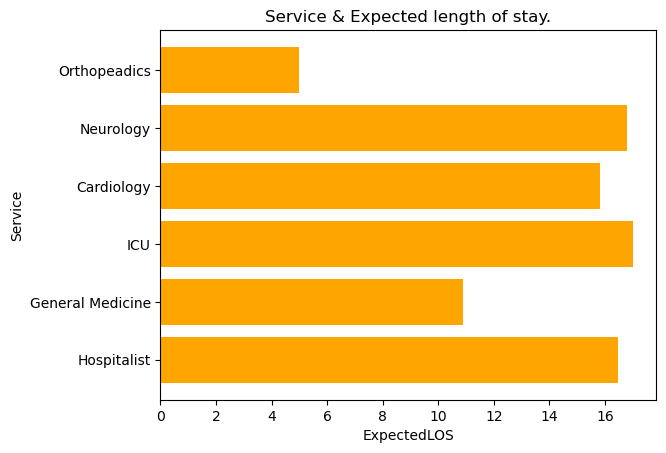

In [22]:
df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
x= df['Service']
y= df['ExpectedLOS']
plt.barh(x,y,color="orange")
plt.ylabel("Service")
plt.xlabel("ExpectedLOS")
plt.title("Service & Expected length of stay.")
plt.show()

# 56.) Count of canceled status.

In [23]:
df = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")

counts_canceled = df['VisitStatus'].value_counts()['Canceled']
counts_canceled

60

# 57.) Find the age prone to get stroke.

In [24]:
df1 = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df2 = pd.read_excel("HospitalDatabase.xlsx","Patients")

df3=pd.merge(df1,df2, on='PatientID')

df3 = df3[(df3['PrimaryDiagnosis'] == 'Stroke')]

ts = pd.Timestamp.now()

df3['DateOfBirth'] = pd.to_datetime(df3['DateOfBirth'])

df3['Age'] = (ts - df3['DateOfBirth']).astype('<m8[Y]')

Age_group = df3.groupby(['Age'])['PatientID'].count().reset_index(name='Stroke Patient Count')
max_age_group= Age_group.sort_values('Stroke Patient Count',ascending = 0)
print('\033[1m' +"The top 3 stroke patients  ages are :"+ '\033[0m')
max_age_group.head(3)


The top 3 stroke patients  ages are :


,Age,Stroke Patient Count
24,61.0,6
21,58.0,5
4,40.0,5


# 58.) Display total count of patients service wise based on gender.

In [25]:
df1 = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df2 = pd.read_excel("HospitalDatabase.xlsx","Patients")

df3=pd.merge(df1,df2, on='PatientID')
df3
total_count_of_patients=df3.groupby(['Gender','Service']).size()
total_count_of_patients

Gender  Service         
Female  Cardiology           41
        General Medicine    114
        Hospitalist          35
        ICU                  65
        Neurology            34
        Orthopeadics         22
Male    Cardiology           54
        General Medicine    149
        Hospitalist          66
        ICU                  86
        Neurology            31
        Orthopeadics         23
dtype: int64

# 59.)Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [26]:
df = pd.read_excel("HospitalDatabase.xlsx","Providers")
df2 = pd.DataFrame(df.ProviderName.str.split(' ').tolist(),
                         columns = ['Firstname','Lastname'])
df2

,Firstname,Lastname
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


# 60.)Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [27]:
df = pd.read_excel("HospitalDatabase.xlsx","Discharges")

number_of_days = int(input('Enter the number of days: '))

filtered_df = df[df['ExpectedLOS'] > number_of_days]
patient_ids = filtered_df['PatientID']

print(f'List of Patients whose Expected LOS is greater than {number_of_days} : \n{patient_ids} ')

Enter the number of days: 4
List of Patients whose Expected LOS is greater than 4 : 
0        9
1       93
2      101
3      102
6      115
      ... 
715    716
716    723
717    724
718    733
719    742
Name: PatientID, Length: 625, dtype: int64 
